# Statistical Learning Projetc

**By:** Thomas Labreur

**Teacher:** Frank Iutzeler

You can find the entire proect on my github page : https://github.com/Thomas-labreur/StatLearnProject.git

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

## Retrieve Data

In [167]:
# Load train data
X = np.loadtxt("data/X.txt")
y = np.loadtxt("data/y.txt")

# Load try data
X_try = np.loadtxt("data/X_try.txt")
y_try = np.loadtxt("data/y_try.txt")

# Load validation data
X_val = np.loadtxt("data/X_val.txt")

# Pre-processing
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

print(f"La classe 1 représente {np.round(100*np.sum(y)/len(y),2)} % des données de X et {np.round(100*np.sum(y_try)/len(y_try),2)} % des données de X_try.")

La classe 1 représente 33.0 % des données de X et 17.5 % des données de X_try.


### Correlations

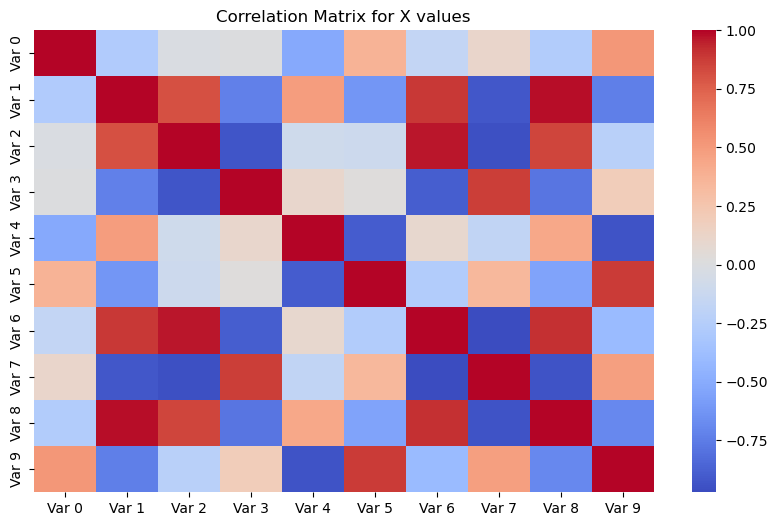

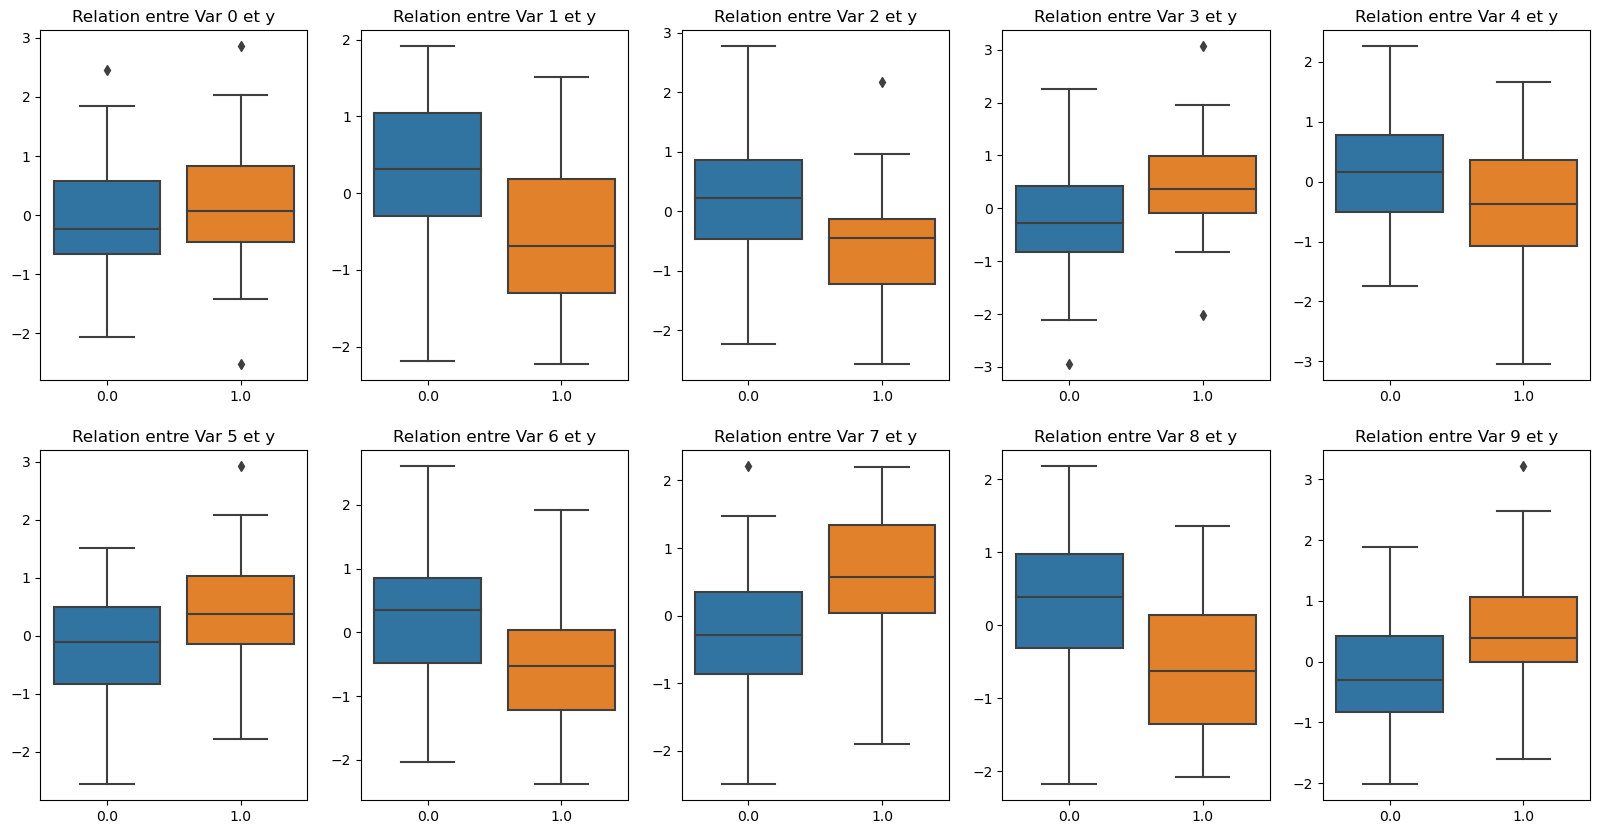

In [16]:
# Compute matrix
correlation_matrix = np.corrcoef(X, rowvar=False)

# Display matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f",
            xticklabels=[f"Var {i}" for i in range(X.shape[1])],
            yticklabels=[f"Var {i}" for i in range(X.shape[1])])
plt.title("Correlation Matrix for X values")
plt.show()

plt.figure(figsize=(20, 10))
for i in range(X.shape[1]):
    plt.subplot(2,5,i+1)
    sns.boxplot(x=y, y=X[:,i])
    plt.title(f"Relation entre Var {i} et y")
plt.show()

### PCA

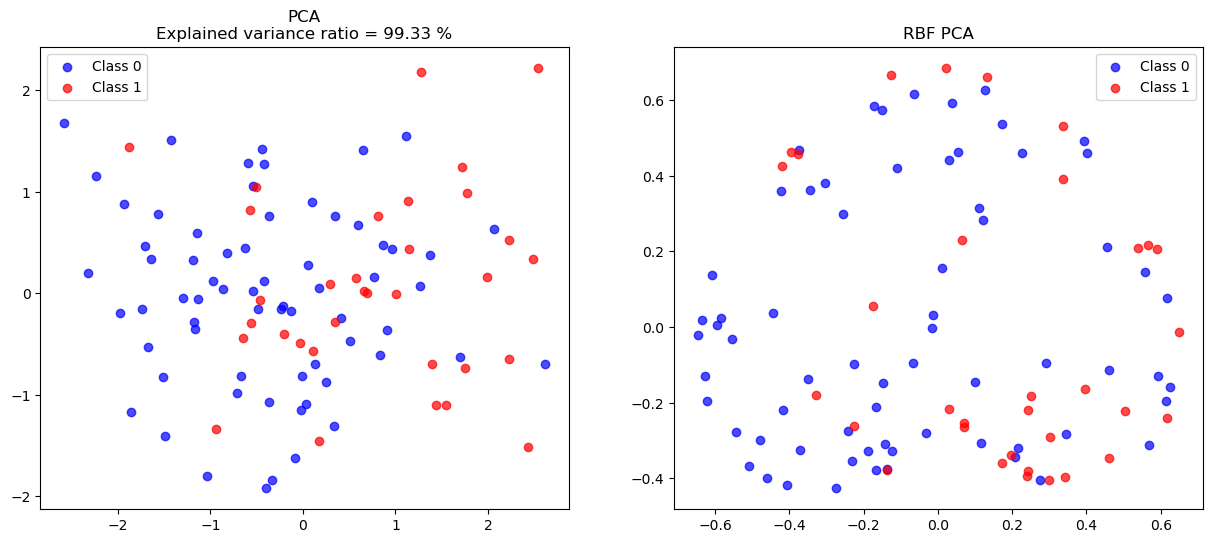

In [150]:
# Classic PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
ex_ratio = np.round(100*np.sum(pca.explained_variance_ratio_),2)
class_0 = X_pca[y == 0]
class_1 = X_pca[y == 1]

# Plot classic PCA results
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.title(f"PCA\nExplained variance ratio = {ex_ratio} %")
plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', label='Class 0', alpha=0.7)
plt.scatter(class_1[:, 0], class_1[:, 1], c='red', label='Class 1', alpha=0.7)
plt.legend()

# Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma = 1)
X_pca = kpca.fit_transform(X)
class_0 = X_pca[y == 0]
class_1 = X_pca[y == 1]

# Plot Kernel PCA results
plt.subplot(1,2,2)
plt.title(f"RBF PCA")
plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', label='Class 0', alpha=0.7)
plt.scatter(class_1[:, 0], class_1[:, 1], c='red', label='Class 1', alpha=0.7)
plt.legend()
plt.show()

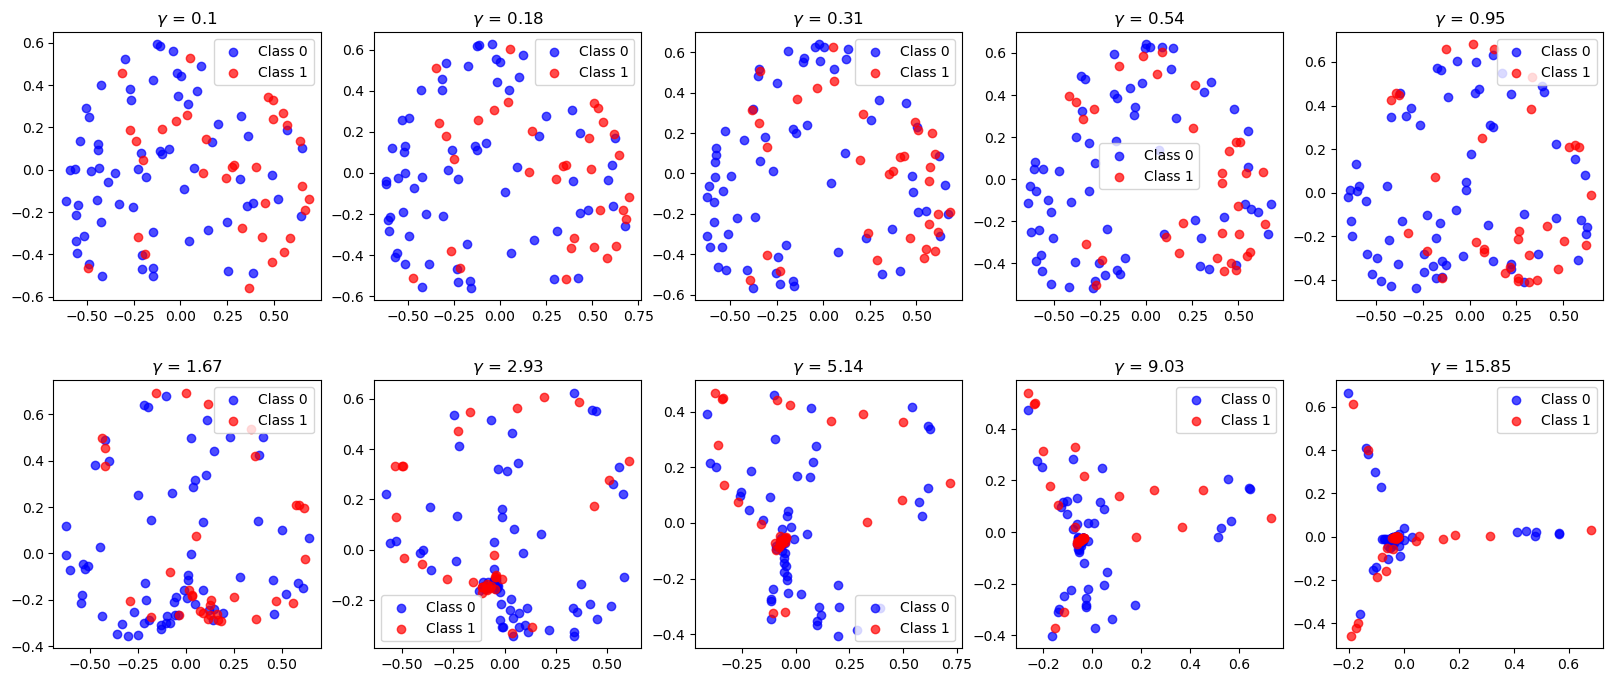

In [149]:
plt.figure(figsize=(20,8))
for i,gam in enumerate(np.logspace(-1,1.2,10)):
    
    # Kernel PCA
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=gam)
    X_pca = kpca.fit_transform(X)
    class_0 = X_pca[y == 0]
    class_1 = X_pca[y == 1]

    # Plot Kernel PCA results
    plt.subplot(2,5,i+1)
    plt.title(f"$\gamma$ = {np.round(gam,2)}")
    plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', label='Class 0', alpha=0.7)
    plt.scatter(class_1[:, 0], class_1[:, 1], c='red', label='Class 1', alpha=0.7)
    plt.legend()
    
plt.subplots_adjust(hspace=.3)
plt.show()

## Outlier Detection

pred = (array([ 4, 14, 19, 35], dtype=int64),)
real = (array([ 4, 14, 19, 35], dtype=int64),)


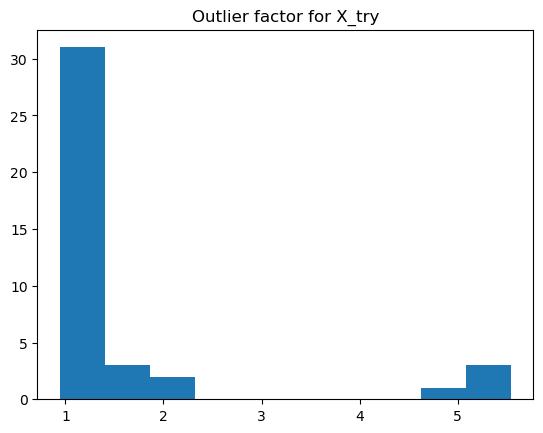

(array([17, 32, 43, 47, 51, 55, 59, 77, 82, 98], dtype=int64),)


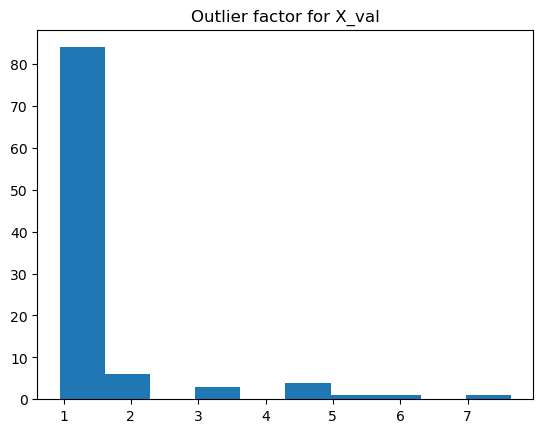

In [174]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=6, contamination=0.1)
outlier_pred = lof.fit_predict(X_try)
print("pred =", np.where(outlier_pred==-1))
print('real =', np.where(y_try==-1))

plt.hist(-lof.negative_outlier_factor_)
plt.title("Outlier factor for X_try")
plt.show()

outlier_pred = lof.fit_predict(X_val)
print( np.where(outlier_pred==-1))
plt.hist(-lof.negative_outlier_factor_)
plt.title("Outlier factor for X_val")
plt.show()

pred = (array([ 4, 14, 19, 35], dtype=int64),)
real = (array([ 4, 14, 19, 35], dtype=int64),)


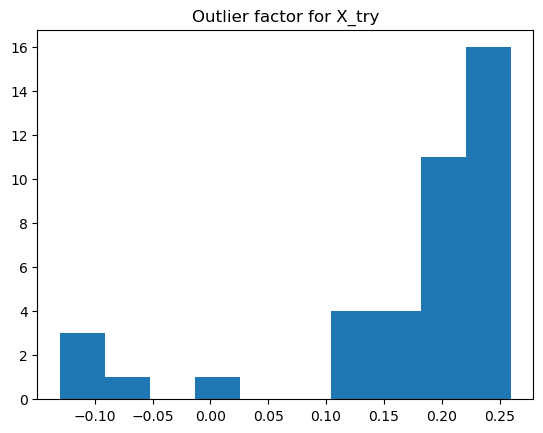

(array([17, 32, 47, 51, 55, 59, 77, 82, 84, 98], dtype=int64),)


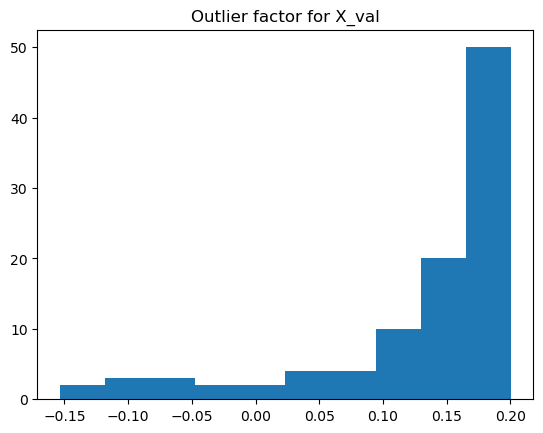

In [175]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest(n_estimators=200, contamination=0.1)
outlier_pred = isf.fit_predict(X_try)
print("pred =", np.where(outlier_pred==-1))
print('real =', np.where(y_try==-1))

plt.hist(isf.decision_function(X_try))
plt.title("Outlier factor for X_try")
plt.show()

outlier_pred = isf.fit_predict(X_val)
print( np.where(outlier_pred==-1))
plt.hist(isf.decision_function(X_val))
plt.title("Outlier factor for X_val")
plt.show()